# Item: PyTorch Gradients

## Contents
* [Acknowledgements](#ackw)
* [Overview](#overview) 
* [PyTorch gradients](#ekf)
    * [Partial derivatives](#test_case_1) 
    * [Plot the derivative](#test_case_2)
* [References](#refs)

## <a name="ackw"></a> Acknowledgements

The Python code for this notebook is edited for the course <a href="https://courses.edx.org/courses/course-v1:IBM+DL0110EN+3T2018/course/"> Deep Learning with Python and PyTorch</a> on <a href="https://www.edx.org/">edX</a>.

## <a name="overview"></a> Overview

Very often in machine learning and deep learning in particular, we need to calculate the gradients of a function. For example , when we minimize the cost function when performing linear regression, we need to calculate the gradients of that function with respect to the weights. In this notebook, we will discuss how to compute gradients in PyTorch. 

## <a name="ekf"></a> PyTorch gradients

Oftent than not we want to calculate the gradients of a function. Calculating the gradient of a function in PyTorch boils down to setting the ```requires_grad``` parameter. One thing you should note is that PyTorch only calculates the derivatives of scalar functions.

In [1]:
import torch

The function $y = x^2$ is represented as

In [11]:
x = torch.tensor(2., requires_grad=True)
y = x**2

In fact, above we have represented 

$$y(x=2)$$

Calculate the derivative of $y$ with respect to $x$. That is we calculate


$$\frac{dy}{dx}|_{x=2} = 2x = 4$$

In [12]:
y.backward()

We get access to the derivative by using ```grad```

In [15]:
x.grad

tensor(4.)

Note that **we are not** using ```y.grad``` but ```x.grad```. Let's see another example.

In [19]:
x = torch.tensor(2., requires_grad=True)

In [20]:
z = x**2 + 2.0*x +1

In [21]:
z.backward()

In [22]:
x.grad

tensor(6.)

If we want to retain the graph, we need to zero the gradient i.e. call ```x.grad.zero()``` and call ```z.backward(retain_graph=True)```

### <a name="test_case_1"></a> Partial derivatives

We now turn our attention to partial derivatives. Consider the function

$$f(u,v) = uv + u^2$$

Them, we have

$$\frac{\partial f}{\partial u} = v + 2u, \frac{\partial f}{\partial v} = u$$

Calcuating the partial derivatives is not very different to what we did above.

In [34]:
u = torch.tensor(1., requires_grad=True)
v = torch.tensor(2., requires_grad=True)

In [35]:
f = u*v + u**2

In [36]:
print(f)

tensor(3., grad_fn=<AddBackward0>)


In [37]:
f.backward()

In [39]:
u.grad

tensor(4.)

In [28]:
v.grad

tensor(1.)

### <a name="test_case_2"></a> Plot the derivative

In [46]:
import matplotlib.pyplot as plt

In [47]:
x = torch.linspace(-10, 10, 10, requires_grad=True)
Y = x**2

In [48]:
y=torch.sum(x**2)

In [49]:
y.backward()

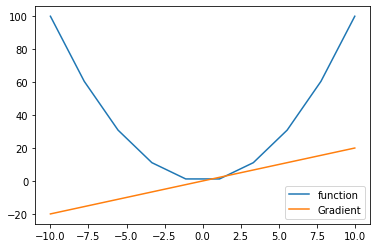

In [50]:
plt.plot(x.detach().numpy(), Y.detach().numpy(), label='function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label='Gradient')
plt.legend()
plt.show()

## <a name="refs"></a> References

1. Eli Stevens, Luca Antiga, Thomas Viehmann, ```Deep Learning with PyTorch```, Manning Publications.
2. <a href="https://pytorch.org/tutorials/">PyTorch tutorials</a>
3. <a href="https://courses.edx.org/courses/course-v1:IBM+DL0110EN+3T2018/course/"> Deep Learning with Python and PyTorch</a>